Value at risk (VaR) is a statistic that quantifies the extent of possible financial losses within a firm, portfolio, or position over a specific time frame.

Value at Risk (VaR) estimates the maximum potential loss for a portfolio or position over a given time period, at a specific confidence level. For example, if a portfolio has a 10-day VaR of 2% at a 95% confidence level, this means there is a 5% chance that the portfolio could lose more than 2% in value in 10 days.


Expected Shortfall, also known as the Conditional Value at Risk (CVaR), is a risk assessment measure that quantifies the amount of tail risk an investment portfolio has. CVaR is derived by taking a weighted average of the “extreme” losses in the tail of the distribution of possible returns, beyond the value at risk (VaR) cutoff point.

ES focuses on the tail risk, capturing the average of those extreme losses that occur beyond the initial VaR limit, providing a deeper insight into potential worst-case outcomes.

In [1]:
import yfinance as yf
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt

In [2]:
# Define the time period for downloading stock data (10 years)
years = 10
endDate = dt.date.today()                                         # Current date as the end date
startDate = endDate - dt.timedelta(days=365*years)                # Start date is 10 years ago

# List of 8 Indian stocks (NSE tickers) for portfolio analysis
tickers = ['TATASTEEL.NS', 'BPCL.NS', 'NTPC.NS', 'TCS.NS', 'INFY.NS', 'RELIANCE.NS', 'KOTAKBANK.NS', 'HDFCBANK.NS']

# Download the adjusted close prices for the given tickers from Yahoo Finance API
adj_close_df = yf.download(tickers, start=startDate, end=endDate)['Adj Close']
adj_close_df.head()

[*********************100%***********************]  8 of 8 completed


Ticker,BPCL.NS,HDFCBANK.NS,INFY.NS,KOTAKBANK.NS,NTPC.NS,RELIANCE.NS,TATASTEEL.NS,TCS.NS
Date,,,,,,,,
2014-09-12 00:00:00+00:00,64.097000,395.779510,354.335693,531.359863,75.833572,436.388062,17.673925,1116.335938
2014-09-15 00:00:00+00:00,64.115768,397.930176,351.574341,519.904236,74.815132,430.866577,17.391319,1095.230225
2014-09-16 00:00:00+00:00,60.986691,393.605652,352.535034,510.635315,72.750702,420.833496,16.790146,1092.041016
2014-09-17 00:00:00+00:00,59.949917,391.478088,361.205475,507.901825,73.576492,424.808044,17.072748,1109.314697
2014-09-18 00:00:00+00:00,62.140743,396.912659,356.952271,520.699463,75.365646,431.790466,17.314247,1131.191284


Log returns are used instead of simple returns because they are time-additive, meaning that the sum of log returns over multiple periods equals the overall return. This property simplifies calculations for multi-period returns.

In [3]:
# Calculate daily log returns (logarithmic returns) of the stock prices
daily_log_returns = np.log(adj_close_df / adj_close_df.shift(1))           # log return formula
daily_log_returns = daily_log_returns.dropna()                             # Remove any NaN values
daily_log_returns.head()

Ticker,BPCL.NS,HDFCBANK.NS,INFY.NS,KOTAKBANK.NS,NTPC.NS,RELIANCE.NS,TATASTEEL.NS,TCS.NS
Date,,,,,,,,
2014-09-15 00:00:00+00:00,0.000293,0.005419,-0.007824,-0.021795,-0.013521,-0.012733,-0.016119,-0.019087
2014-09-16 00:00:00+00:00,-0.050035,-0.010927,0.002729,-0.017989,-0.027982,-0.023561,-0.035179,-0.002916
2014-09-17 00:00:00+00:00,-0.017146,-0.005420,0.024297,-0.005367,0.011287,0.009400,0.016691,0.015694
2014-09-18 00:00:00+00:00,0.035892,0.013787,-0.011845,0.024885,0.024026,0.016303,0.014046,0.019529
2014-09-19 00:00:00+00:00,-0.007654,0.002444,0.001365,0.015109,0.009813,-0.009448,0.010920,0.026847


In [4]:
# Assuming an equally weighted portfolio of 100,00,00,000 INR (Rs. 100 Crores)
portfolio_value = 1000000000
weights = np.array([1/len(tickers)]*len(tickers))                # Equal weights for all stocks
print(weights)

# Calculate daily portfolio returns using matrix multiplication
historical_portfolio_returns = daily_log_returns.dot(weights)
print(historical_portfolio_returns)

[0.125 0.125 0.125 0.125 0.125 0.125 0.125 0.125]
Date
2014-09-15 00:00:00+00:00   -0.010671
2014-09-16 00:00:00+00:00   -0.020732
2014-09-17 00:00:00+00:00    0.006179
2014-09-18 00:00:00+00:00    0.017078
2014-09-19 00:00:00+00:00    0.006175
                               ...   
2024-09-02 00:00:00+00:00   -0.001322
2024-09-03 00:00:00+00:00   -0.004041
2024-09-04 00:00:00+00:00   -0.001900
2024-09-05 00:00:00+00:00   -0.000250
2024-09-06 00:00:00+00:00   -0.012637
Length: 2459, dtype: float64


The rolling window sum aggregates returns over a specific time period (here, 10 days) to capture the cumulative performance of the portfolio over that duration. This helps in calculating the Value at Risk (VaR) and Expected Shortfall (ES) for the given time horizons

In [5]:
# Define the time horizon (10 days in this case) for the VaR calculation
days = 10

# Rolling window sum to get X-day portfolio returns
range_returns = historical_portfolio_returns.rolling(window=days).sum()         # 10-day cumulative returns
range_returns = range_returns.dropna()                                          # Drop NaN values
print(range_returns)

Date
2014-09-26 00:00:00+00:00   -0.027008
2014-09-29 00:00:00+00:00   -0.016536
2014-09-30 00:00:00+00:00    0.008299
2014-10-01 00:00:00+00:00    0.000494
2014-10-07 00:00:00+00:00   -0.022226
                               ...   
2024-09-02 00:00:00+00:00    0.015717
2024-09-03 00:00:00+00:00    0.004492
2024-09-04 00:00:00+00:00    0.002135
2024-09-05 00:00:00+00:00    0.002086
2024-09-06 00:00:00+00:00   -0.008071
Length: 2450, dtype: float64


In [6]:
# Confidence levels for VaR analysis (90%, 95%, 99%)
confidence_levels = [0.9, 0.95, 0.99]

# Calculate VaR for each confidence level
VaRs = []                                                   # List to store VaR values

for cl in confidence_levels:
    VaR = -np.percentile(range_returns, 100 - (cl * 100))   # VaR is negative, so we negate it
    VaRs.append(VaR)

# Convert the VaR % to INR Values
VaRs_inr = []                                               # List to store VaR values in INR

for cl in confidence_levels:
    VaR_inr = -np.percentile(range_returns, 100 - (cl * 100))*portfolio_value
    VaRs_inr.append(VaR_inr)

VaRs, VaRs_inr

([np.float64(0.02943309372586484),
  np.float64(0.04447155174225776),
  np.float64(0.0847746364985313)],
 [np.float64(29433093.725864843),
  np.float64(44471551.74225776),
  np.float64(84774636.4985313)])

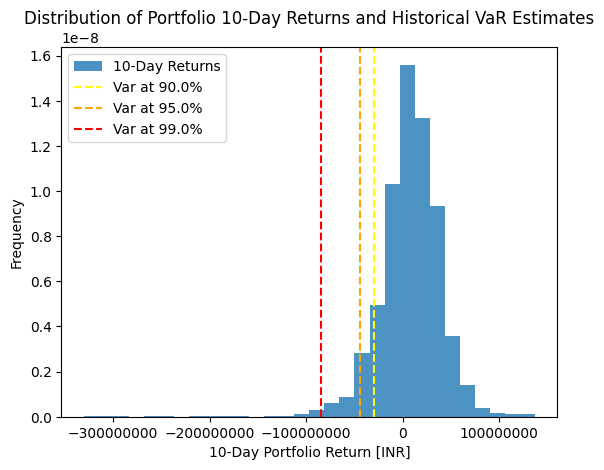

Value at Risk (VaR)
--------------------------------------------------
Confidence Level    VaR(%)        VaR(INR)
--------------------------------------------------
      90.0%         2.94%     29433093.73 INR
      95.0%         4.45%     44471551.74 INR
      99.0%         8.48%      84774636.5 INR
--------------------------------------------------
Portfolio Value: 1000000000 INR
--------------------------------------------------


In [15]:
# Visualization: Plot histogram of portfolio returns with VaR lines

# Convert 10-day returns to INR values
range_returns_inr = range_returns * portfolio_value

# Create a histogram for the distribution of 10-day returns                                              # Distribution of returns
plt.hist(range_returns_inr, bins=30, density=True, alpha=0.8, label=f'{days}-Day Returns')               #Bins are the number of intervals you want to divide all of your data into


# Plot VaR lines at each confidence level (90%, 95%, 99%) on the histogram
colors = ['yellow', 'orange', 'red']
for cl, VaR_inr, color in zip(confidence_levels, VaRs_inr, colors):
    plt.axvline(x=-VaR_inr, linestyle="--", color=color, label=f'Var at {cl*100}%')

# Set plot labels and title
plt.xlabel(f'{days}-Day Portfolio Return [INR]')
plt.ylabel("Frequency")
plt.title(f'Distribution of Portfolio {days}-Day Returns and Historical VaR Estimates')
plt.legend()
plt.gcf().axes[0].xaxis.get_major_formatter().set_scientific(False)
plt.show()

# Print the VaR results in both percentage and INR terms
print("Value at Risk (VaR)")
print('-' * 50)
print(f'{"Confidence Level":<20}{"VaR(%)":<14}{"VaR(INR)"}')
print('-' * 50)

for cl, VaR, VaR_inr in zip(confidence_levels, VaRs, VaRs_inr):
    print(f'{cl * 100:>10}% {round(VaR, 4)*100:>12}% {round(VaR_inr, 2):>15} INR')
print('-' * 50)
print(f'{"Portfolio Value: "}{portfolio_value} INR')
print('-' * 50)


In [16]:
# Expected Shortfall (CVaR) Calculation
CVaRs = []

# Calculate CVaR for each confidence level by taking the mean of returns beyond VaR
for cl, VaR in zip(confidence_levels, VaRs):
    tail_loss = range_returns[range_returns < -VaR]         # Tail loss, i.e., returns below VaR threshold
    if len(tail_loss) > 0:
        CVaR = -np.mean(tail_loss)                          # Take the mean of tail losses
    CVaRs.append(CVaR)


In [17]:
# Convert CVaR values to INR
CVaRs_inr = []
for cl, VaR in zip(confidence_levels, VaRs):
    tail_loss = range_returns[range_returns < -VaR]
    if len(tail_loss) > 0:
        CVaR_inr = -np.mean(tail_loss)*portfolio_value   # Convert to INR
    CVaRs_inr.append(CVaR_inr)

# Print the CVaR results
print("Expected Shortfall (ES/CVaR)")
print('-' * 50)
print(f'{"Confidence Level":<20}{"CVaR(%)":<14}{"CVaR(INR)"}')
print('-' * 50)

for cl, CVaR, CVaR_inr in zip(confidence_levels, CVaRs, CVaRs_inr):
    print(f'{cl * 100:>10}% {round(CVaR, 3)*100:>12}% {round(CVaR_inr, 2):>15} INR')
print('-' * 50)
print(f'{"Portfolio Value: "}{portfolio_value} INR')

Expected Shortfall (ES/CVaR)
--------------------------------------------------
Confidence Level    CVaR(%)       CVaR(INR)
--------------------------------------------------
      90.0%          5.7%     57342191.89 INR
      95.0%          7.8%     78156932.55 INR
      99.0%         15.5%    155347088.21 INR
--------------------------------------------------
Portfolio Value: 1000000000 INR
